In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 24 #

## Bootstrap 

In [2]:
sf = Table.read_table('san_francisco_2019.csv')
min_salary = 15 * 20 * 50
sf = sf.where('Salary', are.above(min_salary))

In [3]:
sf.num_rows

37103

/Users/bj117/anaconda3/lib/python3.11/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


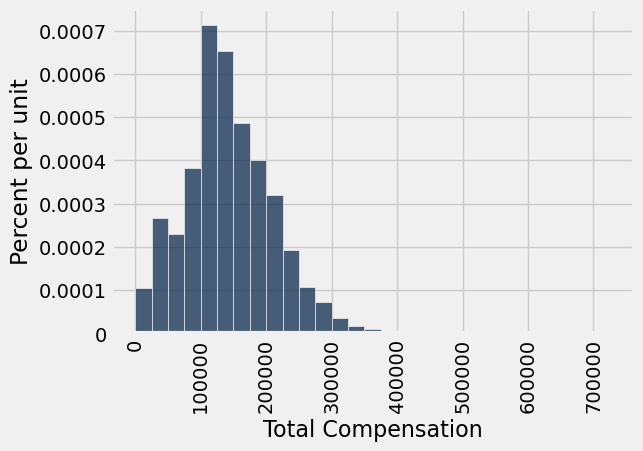

In [4]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [5]:
# Parameter: Median total compensation in the population
def median_comp(t):
    return percentile(50, t.column('Total Compensation'))

median_comp(sf)

135747.0

In [6]:
our_sample = sf.sample(400, with_replacement=False)

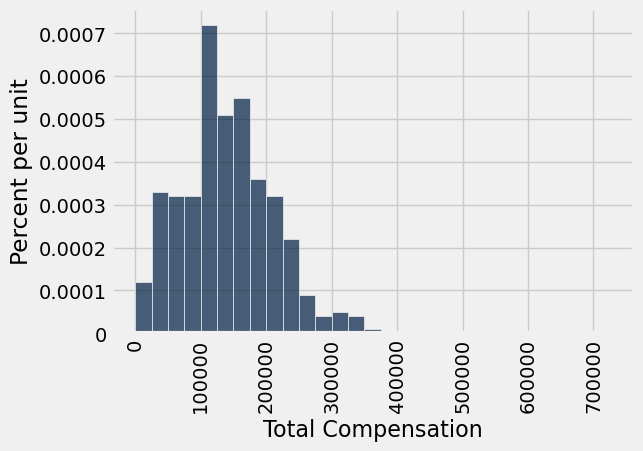

In [7]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [8]:
percentile(50, our_sample.column('Total Compensation') )

135346.0

# Bootstrap

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

In [9]:
# Default behavior of tbl.sample:
# at random with replacement,
# the same number of times as rows of tbl

bootstrap_sample = our_sample.sample()

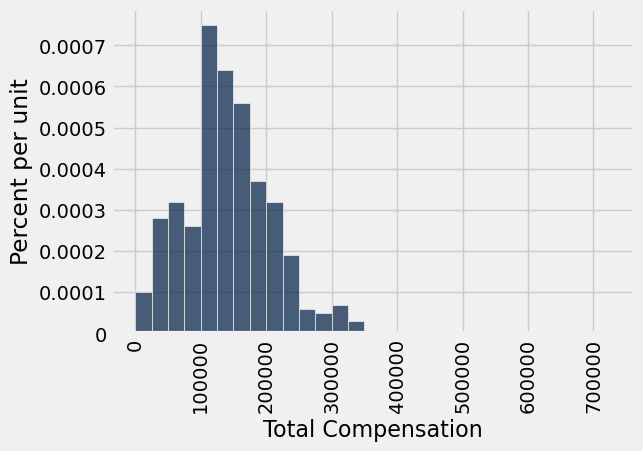

In [10]:
bootstrap_sample.hist('Total Compensation', bins=sf_bins)

## Bootstrap Sample Median
This is one estimate of the population median.

In [11]:
percentile(50, bootstrap_sample.column('Total Compensation'))

135484.0

In [12]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = our_sample.sample()
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [17]:
one_bootstrap_median()

133683.0

In [18]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

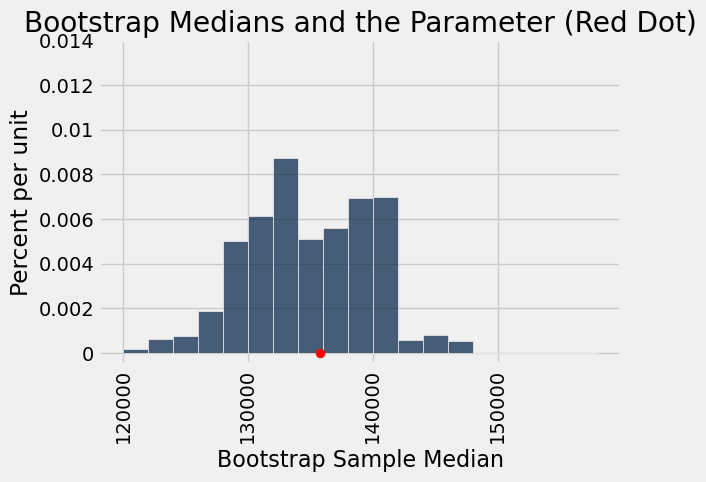

In [20]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(median_comp(sf), 0, color='red', s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Red Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [21]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([ 124491.,  144210.])

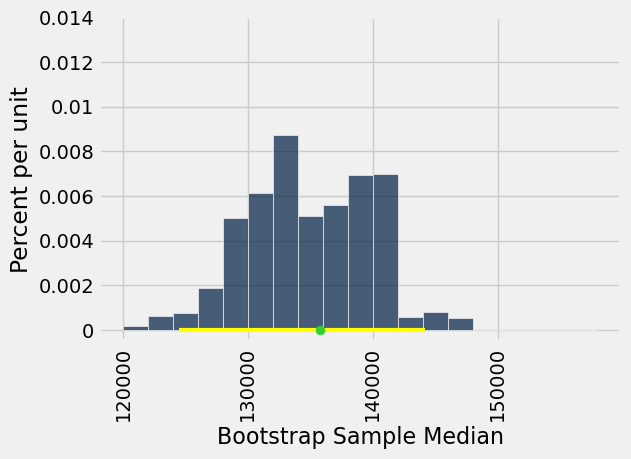

In [22]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(median_comp(sf), 0, color=parameter_green, s=40, zorder=2);

## Confidence Interval for Unknown Population Mean

In [ ]:
# Random sample of mother-newborn pairs
births = Table.read_table('baby.csv')
births

In [ ]:
births.hist('Maternal Age')

In [ ]:
# Average age of mothers in the sample
np.average(births.column('Maternal Age'))

### Question
What is the average age of the mothers in the population?

In [ ]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [ ]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

### Bootstrap Percentile Method for Confidence Interval

The interval of estimates is the "middle 95%" of the bootstrap estimates.

This is called a *95% confidence interval* for the mean age in the population.

In [ ]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

In [ ]:
births.hist('Maternal Age')
plots.plot([left, right], [0, 0], color='yellow', lw=8);

## Using the Confidence Interval for Testing Hypotheses

**Null:** The average age of mothers in the population is 25 years; the random sample average is different due to chance.

**Alternative:** The average age of the mothers in the population is not 25 years.

Suppose you use the 5% cutoff for the p-value.

Based on the confidence interval, which hypothesis would you pick?